In [1]:
import os
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

plt.style.use('dark_background')
sns.set_context('notebook')
sns.set_palette('pastel')

In [2]:
input_df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd())+'/preprocessed_data/classifier_input.csv'))
input_df.head()

,user_id,product_id,interactions,sessions,no_view,no_cart,no_remove_from_cart,no_purchase,avg_price,latest_price,price_change,tenure,day_of_week,lifetime_value,prev_1,prev_2,prev_3,event_type
0,2963072,5774240,2.0,1.0,1.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,0.0
1,480054310,5774240,1.0,1.0,0.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,-1.0
2,501725690,5774240,1.0,1.0,0.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,-1.0
3,590757444,5774240,2.0,1.0,0.0,2.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,-1.0
4,590950489,5774240,1.0,1.0,0.0,1.0,0.0,0.0,39.67,39.67,0.0,0.0,6.0,0.0,4.0,2.5,2.0,0.0


In [3]:
convert_dict = {
                'interactions':'int64',
                'sessions':'int64',
                'no_view':'int64',
                'no_cart':'int64',
                'no_remove_from_cart':'int64',
                'no_purchase':'int64',
                'tenure':'int64',
                'day_of_week':'category',
                'event_type':'category',
                }
input_df = input_df.astype(convert_dict)

In [4]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_trans = input_df.copy()
col_filter = [cols for cols in df_trans.columns if cols not in ['user_id','product_id','event_type','day_of_week']]
df_trans.loc[:,col_filter] = pt.fit_transform(df_trans[col_filter])
df_trans.head()

,user_id,product_id,interactions,sessions,no_view,no_cart,no_remove_from_cart,no_purchase,avg_price,latest_price,price_change,tenure,day_of_week,lifetime_value,prev_1,prev_2,prev_3,event_type
0,2963072,5774240,1.279028,-0.29109,1.839677,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,0.0
1,480054310,5774240,-0.664254,-0.29109,-0.538840,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,-1.0
2,501725690,5774240,-0.664254,-0.29109,-0.538840,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,-1.0
3,590757444,5774240,1.279028,-0.29109,-0.538840,2.244803,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,-1.0
4,590950489,5774240,-0.664254,-0.29109,-0.538840,-0.383981,-0.247049,-0.106197,2.449544,2.449773,0.028367,-0.27664,6.0,-0.099301,-0.745335,-1.463417,-1.849115,0.0


#### EDA

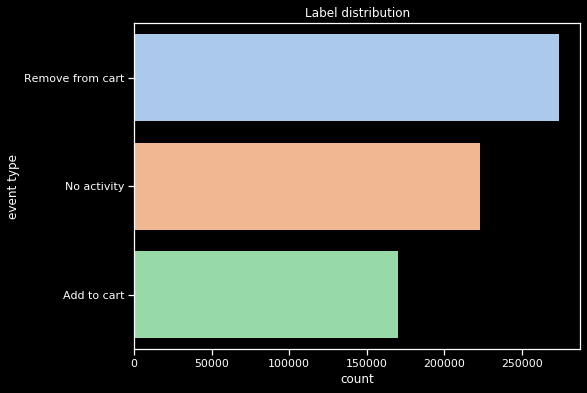

In [6]:
# label distribution
fig, ax = plt.subplots(figsize=(8,6))
a = sns.barplot(x='user_id', y='event_type', \
    data=input_df.groupby('event_type').user_id.count().reset_index(), \
    orient='h', ax=ax)
ax.set(title='Label distribution',xlabel='count', \
       ylabel='event type', \
       yticklabels=['Remove from cart','No activity','Add to cart'])
plt.show()
plt.close()

In [7]:
def plot_feature_distribution(field):
    fig, ax = plt.subplots(2,1,figsize=(8,8))

#     sns.distplot(input_df.loc[input_df.event_type==-1,field],label='Remove from cart', bins=50, hist_kws={'alpha':.6}, kde_kws={'linewidth':3,'bw':0.2}, ax=ax[0])
#     sns.distplot(input_df.loc[input_df.event_type==0,field],label='No activity', bins=50, hist_kws={'alpha':.6}, kde_kws={'linewidth':3,'bw':0.2}, ax=ax[0])
#     sns.distplot(input_df.loc[input_df.event_type==1,field],label='Add to cart', bins=50, hist_kws={'alpha':.6}, kde_kws={'linewidth':3,'bw':0.2}, ax=ax[0])
#     ax[0].set(xlim=(-0.5,20),xlabel=field)
#     ax[0].legend()

    sns.kdeplot(input_df.loc[input_df.event_type==-1,field],label='Remove from cart', shade=True, bw=0.2, ax=ax[0])
    sns.kdeplot(input_df.loc[input_df.event_type==0,field],label='No activity', shade=True, bw=0.2, ax=ax[0])
    sns.kdeplot(input_df.loc[input_df.event_type==1,field],label='Add to cart', shade=True, bw=0.2, ax=ax[0])
    ax[0].set(xlim=-0.5,xlabel=field)
    ax[0].legend()
    
    sns.distplot(df_trans.loc[df_trans.event_type==-1,field],label='Remove from cart', bins=50, hist_kws={'alpha':.6}, kde_kws={'linewidth':3,'bw':0.2}, ax=ax[1])
    sns.distplot(df_trans.loc[df_trans.event_type==0,field],label='No activity', bins=50, hist_kws={'alpha':.6}, kde_kws={'linewidth':3,'bw':0.2}, ax=ax[1])
    sns.distplot(df_trans.loc[df_trans.event_type==1,field],label='Add to cart', bins=50, hist_kws={'alpha':.6}, kde_kws={'linewidth':3,'bw':0.2}, ax=ax[1])
    ax[1].set(xlim=(-3,3),ylim=(0,4),xlabel=field+' transformed')
    ax[1].legend()
    plt.show()
    plt.close()

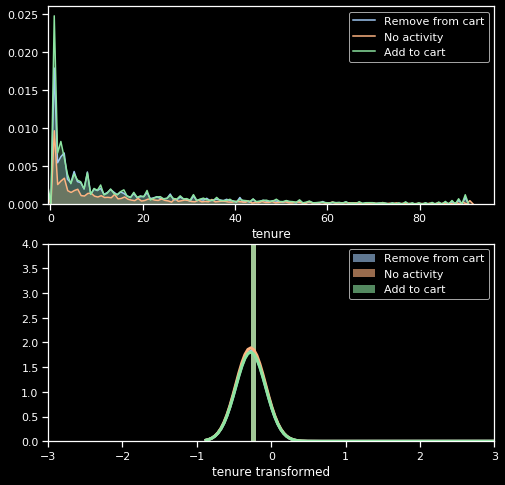

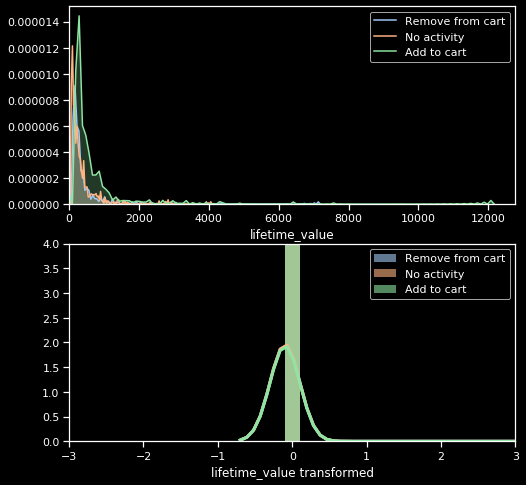

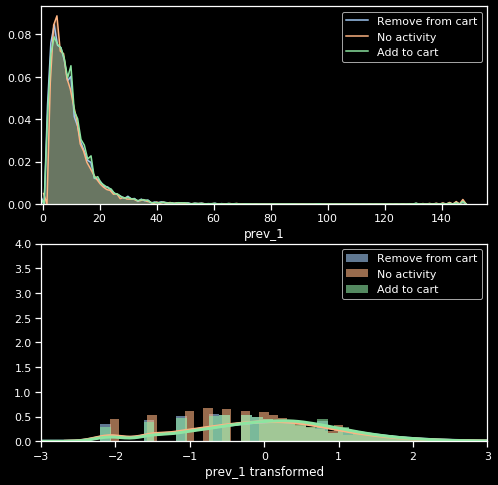

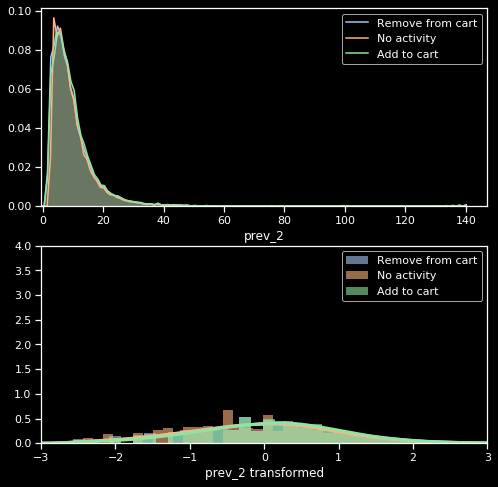

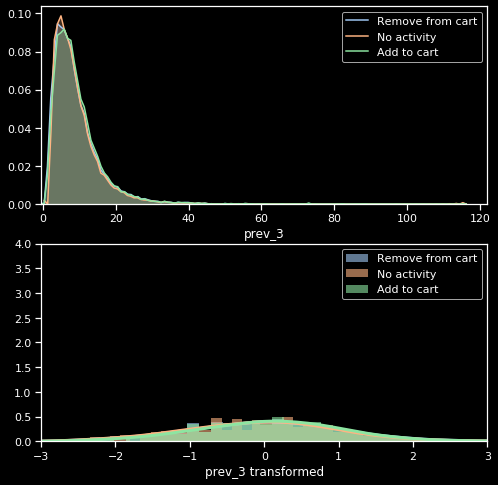

In [8]:
for col in col_filter[-5:]:
    plot_feature_distribution(col)

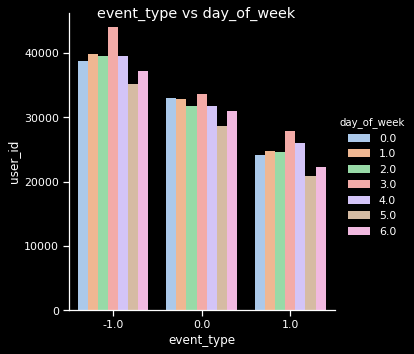

In [9]:
g = sns.catplot(x='event_type',y='user_id', hue='day_of_week', kind='bar',\
            data=input_df.groupby(['day_of_week','event_type']).user_id.count().reset_index())
g.fig.suptitle('event_type vs day_of_week')
plt.show()
plt.close()

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',handle_unknown='error')
ohe.fit(df_trans[['day_of_week']])
ohe_df = pd.DataFrame(ohe.transform(df_trans[['day_of_week']]).toarray(),columns=ohe.get_feature_names(['day_of_week']))
ohe_df.head()

,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_trans['event_type'])
labels = le.transform(df_trans['event_type'])

In [7]:
df_trans = pd.concat([df_trans.drop(['day_of_week'],axis=1),ohe_df],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

predictors = [cols for cols in df_trans.columns if cols not in ['user_id','product_id','event_type']]
X = df_trans[predictors]
y = labels
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(multi_class='ovr',solver='saga',random_state=0).fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.42      0.94      0.58     68719
           1       0.36      0.04      0.07     55641
           2       0.41      0.07      0.13     42471

    accuracy                           0.42    166831
   macro avg       0.40      0.35      0.26    166831
weighted avg       0.40      0.42      0.29    166831



In [14]:
lr = LogisticRegression(multi_class='multinomial',solver='saga',random_state=0).fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.42      0.93      0.58     68719
           1       0.36      0.04      0.07     55641
           2       0.41      0.08      0.13     42471

    accuracy                           0.42    166831
   macro avg       0.40      0.35      0.26    166831
weighted avg       0.40      0.42      0.29    166831



precision    recall  f1-score   support

           0       0.70      0.79      0.74     68719
           1       0.69      0.68      0.68     55641
           2       0.73      0.59      0.65     42471

    accuracy                           0.70    166831
   macro avg       0.71      0.69      0.69    166831
weighted avg       0.70      0.70      0.70    166831



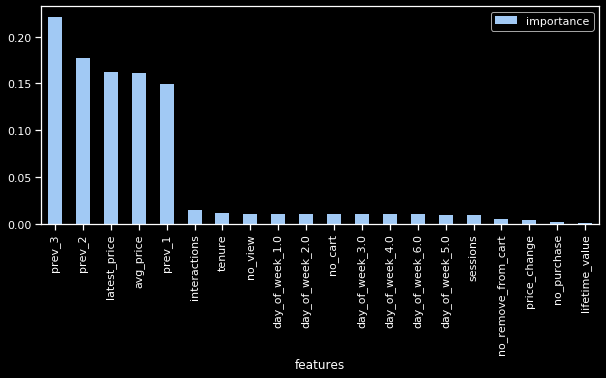

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf = RandomForestClassifier(max_samples=0.5)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
fig,ax = plt.subplots(figsize=(10,4))
pd.DataFrame({'features':predictors,'importance':rf.feature_importances_}).sort_values('importance',ascending=0).plot.bar('features','importance',ax=ax)
plt.show()
plt.close()

precision    recall  f1-score   support

           0       0.41      1.00      0.58     68719
           1       0.00      0.00      0.00     55641
           2       0.00      0.00      0.00     42471

    accuracy                           0.41    166831
   macro avg       0.14      0.33      0.19    166831
weighted avg       0.17      0.41      0.24    166831



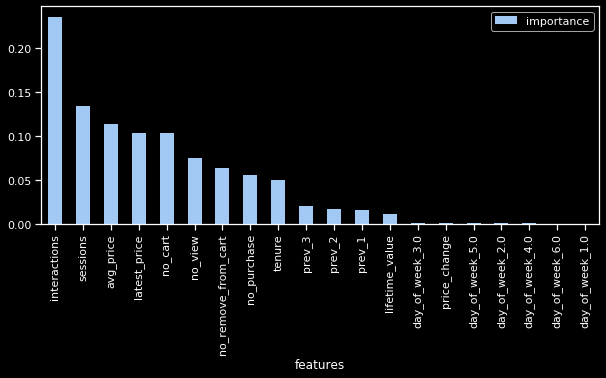

In [9]:
rf = RandomForestClassifier(random_state=0, max_depth=6, n_estimators=200, min_samples_split=0.2, n_jobs=-1, max_samples=0.5)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
fig,ax = plt.subplots(figsize=(10,4))
pd.DataFrame({'features':predictors,'importance':rf.feature_importances_}).sort_values('importance',ascending=0).plot.bar('features','importance',ax=ax)
plt.show()
plt.close()

In [12]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 4)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 20, num = 4)],
    'min_samples_split': [x/10 for x in range(2,5)],
    'bootstrap':[True,False],
    'max_samples':[0.3]
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=15, cv=3, verbose=2, n_jobs=-1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

{'n_estimators': 500, 'min_samples_split': 0.3, 'max_samples': 0.3, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.41      1.00      0.58     68719
           1       0.00      0.00      0.00     55641
           2       0.57      0.00      0.00     42471

    accuracy                           0.41    166831
   macro avg       0.33      0.33      0.19    166831
weighted avg       0.32      0.41      0.24    166831



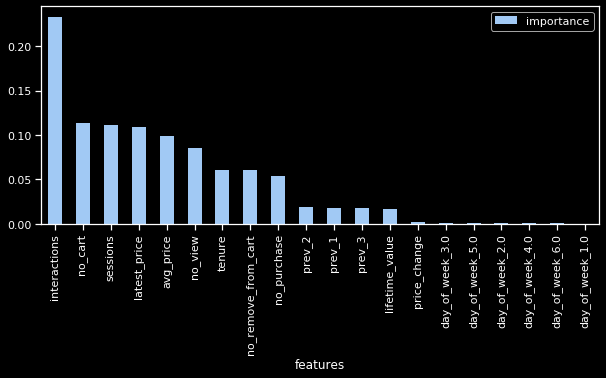

In [15]:
print(rf_random.best_params_)
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test,y_pred))
fig,ax = plt.subplots(figsize=(10,4))
pd.DataFrame({'features':predictors,'importance':best_rf.feature_importances_}).sort_values('importance',ascending=0).plot.bar('features','importance',ax=ax)
plt.show()
plt.close()